In [16]:
from qiskit import *

In [2]:
qr = QuantumRegister(3)

In [3]:
cr = ClassicalRegister(3)

In [4]:
qc = QuantumCircuit(qr,cr)

In [5]:
vector_state = Aer.get_backend('statevector_simulator')

In [6]:
kept = execute(qc,vector_state)

In [7]:
result = kept.result().get_statevector()

In [8]:
for amplitude in result:
    print(amplitude)

(1+0j)
0j
0j
0j
0j
0j
0j
0j


In [9]:
qc2 = QuantumCircuit(qr)

In [14]:
qc2.initialize(result, qr)

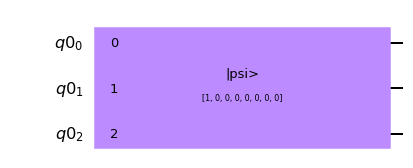

In [15]:
qc2.draw(output='mpl')

In [29]:
qr2 = QuantumRegister(3)

In [33]:
circuit = QuantumCircuit(qr2)

In [39]:
simulator = Aer.get_backend('statevector_simulator')

In [40]:
result = execute(circuit, simulator)

In [41]:
state_vector = result.result().get_statevector()

In [43]:
circuit2 = QuantumCircuit(qr2)

In [24]:
for j in state_vector:
    print(j)

(1+0j)
0j
0j
0j
0j
0j
0j
0j


In [44]:
circuit2.initialize(state_vector, qr2)

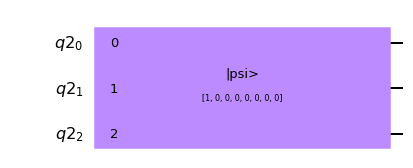

In [45]:
circuit2.draw(output='mpl')

In [51]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [52]:
provider = IBMQ.get_provider('ibm-q')

In [53]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [54]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.0.0', operational=True, pending_jobs=4, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.0', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=11, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=9, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.0.0', operational=True, pending_jobs=7, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=10, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=27, status_msg='active')


In [55]:
simulating = provider.get_backend('ibmq_16_melbourne')

In [56]:
properties = simulating.properties()

In [57]:
coupling_map = simulating.configuration().coupling_map

In [58]:
from qiskit.providers.aer import noise

In [60]:
noise.model = noise.device.basic_device_noise_model(properties)

In [71]:
new_qc = QuantumCircuit(2,2)
new_qc.x(1)
new_qc.measure(0,0)
new_qc.measure(1,1)

In [84]:
job = execute(new_qc, emulator,shots=1024, noise_model = noise.model, coupling_map = coupling_map, basis_gates = noise.model.basis_gates).result()

In [72]:
emulator = Aer.get_backend('qasm_simulator')

In [85]:
job.get_counts()

{'10': 946, '00': 46, '11': 32}

In [81]:
qr3 = QuantumRegister(3)
qc3 = QuantumCircuit(qr3, name='toogle_cx')
qc3.cx(0,1)
qc3.cx(1,2)
qc3.cx(0,1)
qc3.cx(1,2)
toggle_cx = qc3.to_instruction()
qc4 = QuantumCircuit(qr3)
qc4.append(toggle_cx,qr3)

In [82]:
qc3.draw()

In [83]:
qc4.draw()